# Welcome to the Exploratory Data Analysis of Unicorn Companies Dataset

This dataset about private companies with a valuation over $1 billion as of March 2022, including each company's current valuation, funding, country of origin, industry, select investors, and the years they were founded and became unicorns.

#### Asking Question

1) Which unicorn companies have had the biggest return on investment?

2) How long does it usually take for a company to become a unicorn? Has it always been this way?

3) Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

4) Which investors have funded the most unicorns?

and some more, answer for which you can get later



## Step 0 - Imports

#### Imports relevant libraries, modules and read csv-file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('/Users/maryshvaya/Downloads/Unicorn+Companies/Unicorn_Companies.csv')

In [3]:
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."





## Step 1 - Data Understanding


In [4]:
df.shape

(1074, 10)

In [5]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [6]:
df.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."
1073,Zwift,$1B,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


## Step 2 - Data Preparation


In [8]:
#We can see above, that column 'Data Joined' it's 'object' format.

#That's why we need to change data type to 'datetime'.

df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

In [9]:
df.drop_duplicates().shape

(1074, 10)

In [10]:
#The number of rows and columns is the same, so we can say that this data set is already clean.

In [11]:
#Let's create new columns by extracting year and month(as name) 
#from 'Date Joined' column

df['Year Joined'] = df['Date Joined'].dt.year
df['Month Joined'] = df['Date Joined'].dt.month_name()
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,December


In [12]:
#Also create new column: 
#how many years needed each company to become Unicorn

df['Years To Unicorn'] = df['Year Joined'] - df['Year Founded']
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Unicorn
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,December,6


In [13]:
df['Years To Unicorn'].describe()

count    1074.000000
mean        7.000931
std         5.329672
min        -4.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years To Unicorn, dtype: float64

In [14]:
#describe() method shows negative value as minimum value.
#Let's check which row/s have this value:

df[df['Years To Unicorn'] < 0]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Unicorn
714,Yidian Zixun,$1B,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund",2017,October,-4


In [15]:
#There is a single row where the value of 'Year Founded' specified later, 
#then the value of 'Date Joined' column.

#An internet search reveals that Yidian Zixun company was founded in 2013. 
#Let's replace the value at 'Year Founded'

df.loc[df['Company'] == 'Yidian Zixun', 'Year Founded'] = 2013
df[df['Company'] == 'Yidian Zixun']

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Unicorn
714,Yidian Zixun,$1B,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2013,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund",2017,October,-4


In [16]:
#Recalculate all values in the 'Years To Unicorn' column:

df['Years To Unicorn'] = df['Year Joined'] - df['Year Founded']
df['Years To Unicorn'].describe()

count    1074.000000
mean        7.008380
std         5.319864
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years To Unicorn, dtype: float64

In [17]:
df[df['Company'] == 'Yidian Zixun']

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Unicorn
714,Yidian Zixun,$1B,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2013,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund",2017,October,4


In [18]:
#Let's bring 'Valuation' and 'Funding' columns to the same dimension in billions, 
#for the convenience of further calculations and strip

In [19]:
df['Valuation'].value_counts()

#As we can see that 'Valuation' has only '$' and 'B' signs

Valuation
$1B      471
$2B      248
$3B      115
$4B       72
$5B       40
$6B       26
$7B       18
$10B      15
$8B       13
$9B       10
$12B      10
$11B       7
$13B       4
$15B       4
$100B      2
$20B       2
$32B       2
$38B       2
$40B       2
$17B       1
$14B       1
$18B       1
$22B       1
$25B       1
$27B       1
$33B       1
$39B       1
$46B       1
$95B       1
$180B      1
Name: count, dtype: int64

In [20]:
#Create new column without '$B' signs with 'integer' data type:

df['Valuation In Billion'] = df['Valuation'].str.strip('$B').astype(int)

df[['Valuation', 'Valuation In Billion']].head()

,Valuation,Valuation In Billion
0,$180B,180
1,$100B,100
2,$100B,100
3,$95B,95
4,$46B,46


In [21]:
#Check unique values in 'Funding' column to know which signs we need to remove:

df['Funding'].value_counts()

Funding
$1B        60
$2B        30
Unknown    12
$200M      12
$4B         9
           ..
$717M       1
$101M       1
$19M        1
$946M       1
$620M       1
Name: count, Length: 539, dtype: int64

In [22]:
#We have '$BM' signs and also 12 'Unknown' values

In [23]:
#Now let's create new column dictionary 'Funding In Billion' that represents 'Funding' 
#column where we replace these signs with the following 
#and bring them to the same dimension:


In [24]:
convert = {'Unknown': '0', 'M': '*0.001', 'B': ''}

df['Funding In Billion'] = df['Funding'].replace(convert, regex=True)\
                                        .str.strip('$').map(pd.eval).astype(float)
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Unicorn,Valuation In Billion,Funding In Billion
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,April,5,180,8.000
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December,10,100,7.000
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,July,10,100,2.000
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,January,4,95,2.000
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,December,6,46,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",2017,June,5,1,0.379
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2017,April,2,1,0.990
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",2021,May,3,1,0.080
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",2021,October,16,1,0.792


In [25]:
df.sort_values(by='Funding In Billion').head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Unicorn,Valuation In Billion,Funding In Billion
733,DistroKid,$1B,2021-08-16,Internet software & services,New York,United States,North America,2013,Unknown,"Insight Partners, Silversmith Capital Partners...",2021,August,8,1,0.0
717,Veepee,$1B,2007-07-02,E-commerce & direct-to-consumer,La Plaine Saint-Denis,France,Europe,2001,Unknown,"Summit Partners, Qatar Holding",2007,July,6,1,0.0
651,Xiaobing,$1B,2021-07-12,Fintech,Beijing,China,Asia,2020,Unknown,"NetEase Capital, Northern Light Venture Capita...",2021,July,1,1,0.0
639,SITECH DEV,$1B,2019-05-16,Other,Guiyang,China,Asia,2017,Unknown,China Prosperity Capital,2019,May,2,1,0.0
947,Kendra Scott,$1B,2016-12-21,Consumer & retail,Austin,United States,North America,2002,Unknown,"Berkshire Partners, Norwest Venture Partners",2016,December,14,1,0.0


In [26]:
#Let's see which part of company has funding less than 1 billion

#for this create a variable up_to_1b_f and make calculations:

In [27]:
up_to_1b_f = len(df[df['Funding In Billion'] < 1])

part_up_to_1b_comp = (up_to_1b_f / df['Funding In Billion'].count() * 100).round(2)

part_up_to_1b_comp

89.39

In [28]:
#and immediately check whether there are companies with less than one million investments:

In [29]:
up_to_1m_f = len(df[df['Funding In Billion'] < 0.001])

part_up_to_1m_comp = (len(df[df['Funding In Billion'] < 0.001]) / df['Funding In Billion'].count() * 100).round(2)

part_up_to_1m_comp

1.21

In [30]:
#Here we see that 89.39% (or 960 companies ) companies have funding of up to 1 billion 
#and 1.21% (or 13 companies) have only 1 million.

In [31]:
#Check for isnull values and number of unigue values in our data set:

In [32]:
df.isnull().sum()

Company                  0
Valuation                0
Date Joined              0
Industry                 0
City                    16
Country                  0
Continent                0
Year Founded             0
Funding                  0
Select Investors         1
Year Joined              0
Month Joined             0
Years To Unicorn         0
Valuation In Billion     0
Funding In Billion       0
dtype: int64

In [33]:
#City has 16 null values. 
#For our analysis this info isn't critical, so I'll just leave it out.

In [34]:
df.nunique()

Company                 1073
Valuation                 30
Date Joined              639
Industry                  16
City                     256
Country                   46
Continent                  6
Year Founded              35
Funding                  539
Select Investors        1058
Year Joined               13
Month Joined              12
Years To Unicorn          30
Valuation In Billion      30
Funding In Billion       538
dtype: int64

In [35]:
#Check for unique values in 'Industry' column:

In [36]:
df['Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications', 'Artificial Intelligence'],
      dtype=object)

In [37]:
#We can see that 'Industry' column has 2 the same values just in differente case: 
#'Artificial intelligence' and 'Artificial Intelligence'

#Therefore, to avoid mistake we replace one to another:

In [38]:
to_replace = {'Artificial Intelligence' : 'Artificial intelligence'}

df['Industry'] = df['Industry'].replace(to_replace)

df['Industry'].nunique()

15

In [39]:
#We already drop duplicates, but let's check is any duplicated values at 
#'Company' column:

In [40]:
df.loc[df.duplicated(subset = 'Company', keep = False)]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Unicorn,Valuation In Billion,Funding In Billion
40,Bolt,$11B,2018-05-29,Auto & transportation,Tallinn,Estonia,Europe,2013,$1B,"Didi Chuxing, Diamler, TMT Investments",2018,May,5,11,1.0
44,Bolt,$11B,2021-10-08,Fintech,San Francisco,United States,North America,2014,$1B,"Activant Capital, Tribe Capital, General Atlantic",2021,October,7,11,1.0


In [41]:
#Having searched for information on the Internet, 
#we were convinced that these are two different companies.

#So we are leaving the information about these companies as it is.

## Step 3 - Feature Understanding

### Time to find return of investments - capital gains - by the following formula:

In [42]:
df['Return Of Investment'] = df['Valuation In Billion'] - df['Funding In Billion']
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Unicorn,Valuation In Billion,Funding In Billion,Return Of Investment
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,April,5,180,8.0,172.0
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December,10,100,7.0,93.0
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,July,10,100,2.0,98.0
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,January,4,95,2.0,93.0
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,December,6,46,4.0,42.0


In [43]:
#Now calculate return of investment in persent as 'ROI, %' column:

In [44]:
df['ROI, %'] = ((df['Return Of Investment'] / df['Funding In Billion']) *100).round(2)
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Unicorn,Valuation In Billion,Funding In Billion,Return Of Investment,"ROI, %"
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,April,5,180,8.0,172.0,2150.00
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December,10,100,7.0,93.0,1328.57
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,July,10,100,2.0,98.0,4900.00
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,January,4,95,2.0,93.0,4650.00
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,December,6,46,4.0,42.0,1050.00


In [45]:
df.value_counts('ROI, %')

ROI, %
200.00    19
400.00    18
300.00    15
inf       13
900.00    10
          ..
350.45     1
60.51      1
349.44     1
345.43     1
450.00     1
Name: count, Length: 655, dtype: int64

In [46]:
#Let's check how much and which company have the biggest return of investment
#for this calculation replace infinite updated data with nan in copied data frame:

df2 = df.copy()
df2.replace([np.inf, -np.inf], np.nan, inplace=True)

In [47]:
# Drop rows with NaN values on 'ROI, %' column:

df2.dropna(subset='ROI, %', inplace=True)
df2.sort_values(by='ROI, %', ascending=False).head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Unicorn,Valuation In Billion,Funding In Billion,Return Of Investment,"ROI, %"
239,Zapier,$4B,2021-01-14,Internet software & services,Sunnyvale,United States,North America,2011,$1M,"Sequoia Capital, Bessemer Venture Partners, Th...",2021,January,10,4,0.001,3.999,399900.00
61,Dunamu,$9B,2021-07-22,Fintech,Seoul,South Korea,Asia,2012,$71M,"Qualcomm Ventures, Woori Investment, Hanwha In...",2021,July,9,9,0.071,8.929,12576.06
792,Workhuman,$1B,2020-06-23,Internet software & services,Dublin,Ireland,Europe,1999,$9M,ICG,2020,June,21,1,0.009,0.991,11011.11
361,CFGI,$2B,2021-09-15,Fintech,Boston,United States,North America,2000,$19M,"The Carlyle Group, CVC Capital Partners",2021,September,21,2,0.019,1.981,10426.32
743,Manner,$1B,2020-12-24,Other,Shanghai,China,Asia,2015,$10M,"Coatue Management, H Capital, Capital Today",2020,December,5,1,0.010,0.990,9900.00


In [48]:
#Let's see how looks like at plot bar:

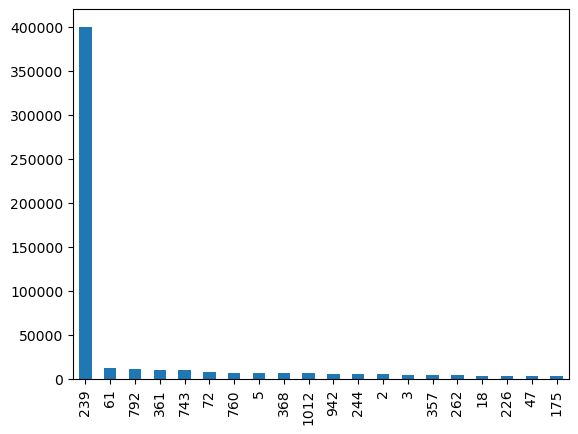

In [49]:
df2['ROI, %'].sort_values(ascending=False)\
           .head(20)\
           .plot(kind='bar')
plt.show()

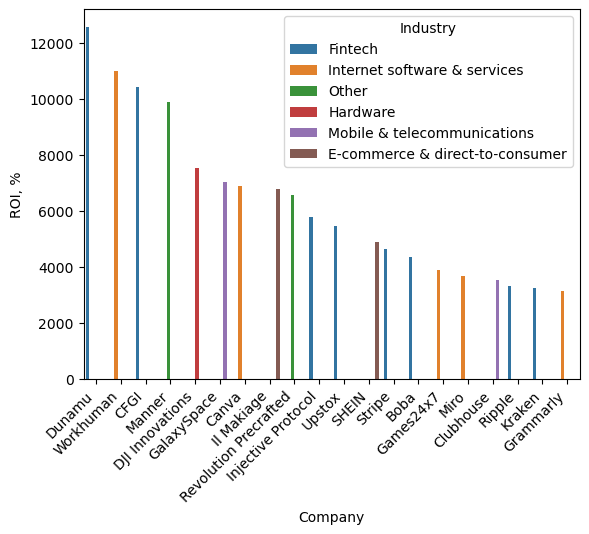

In [50]:
#We have 1 outlier value, let's see how would looks our data without this one:

df2_out = df2[df2['Company'] != 'Zapier'].sort_values(by='ROI, %', ascending=False).head(20)

sns.barplot(
        data= df2_out,
        x='Company',
        y='ROI, %',
        hue='Industry')

plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

In [51]:
#We can see, that most of TOP 20 company by ROI is Fintech and Internet sofware & services.

### Let's see now, how long it usually take for a company to become a Unicorn - minimum, average and maximum:

In [52]:
years = df.groupby('Industry')['Years To Unicorn'] \
                .aggregate(['min', 'mean', 'max']).round() \
                .sort_values('Industry')

years

,min,mean,max
Industry,,,
Artificial intelligence,0,6.0,15
Auto & transportation,0,5.0,14
Consumer & retail,1,8.0,37
Cybersecurity,1,7.0,21
Data management & analytics,0,8.0,22
E-commerce & direct-to-consumer,0,6.0,24
Edtech,3,8.0,17
Fintech,0,7.0,27
Hardware,1,6.0,18


In [53]:
#In average the most companies needs 7-8 year to become Unicorn.

#Also here is some companies which become Unicorn in less than 1 year.

#And finally, here is huge range in 'max' column, let's see more detailed:

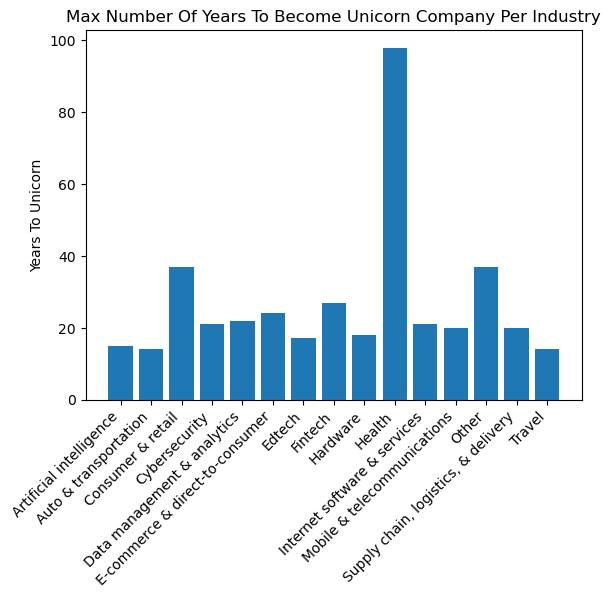

In [54]:
plt.bar(years.index, years['max'])
plt.title('Max Number Of Years To Become Unicorn Company Per Industry')
plt.ylabel('Years To Unicorn')
plt.xticks(rotation = 45, horizontalalignment = 'right')

plt.show()

In [55]:
#As we already know, the biggest number of years to become Unicorn needed Health-company 'Otto Bock HealthCare'
#at the same time - this is also the oldest company in this dataset.

In [56]:
df.sort_values('Years To Unicorn',ascending=False).head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Unicorn,Valuation In Billion,Funding In Billion,Return Of Investment,"ROI, %"
189,Otto Bock HealthCare,$4B,2017-06-24,Health,Duderstadt,Germany,Europe,1919,$0M,EQT Partners,2017,June,98,4,0.000,4.000,inf
373,Promasidor Holdings,$2B,2016-11-08,Consumer & retail,Bryanston,South Africa,Asia,1979,$556M,"IFC, Ajinomoto",2016,November,37,2,0.556,1.444,259.71
699,Five Star Business Finance,$1B,2021-03-26,Other,Chennai,India,Asia,1984,$456M,"Sequoia Capital India, Tiger Global Management...",2021,March,37,1,0.456,0.544,119.30
1043,Thirty Madison,$1B,2021-06-02,Health,New York,United States,North America,1993,$210M,"Northzone Ventures, Maveron, Johnson & Johnson...",2021,June,28,1,0.210,0.790,376.19
840,Radius Payment Solutions,$1B,2017-11-27,Fintech,Crewe,United Kingdom,Europe,1990,$200M,Inflexion Private Equity,2017,November,27,1,0.200,0.800,400.00


In [57]:
#The following bar chart shows the ratio of the number of companies created 
#to those that became unicorns. 

#We can clearly see that companies were most actively created in the period 2010-2015.

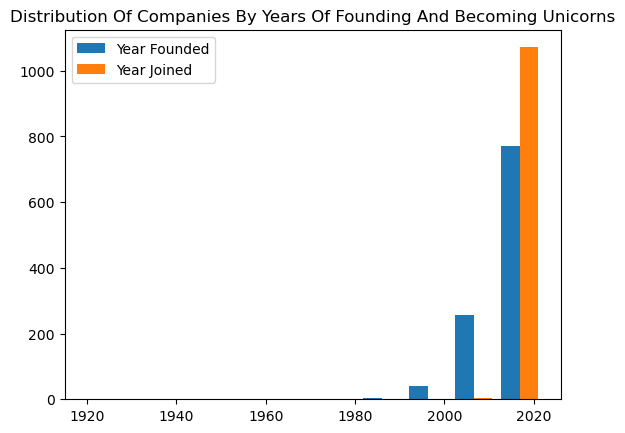

In [58]:
ax = plt.hist([df['Year Founded'], df['Year Joined']],
        bins= 10,
        label=['Year Founded', 'Year Joined'])

plt.title('Distribution Of Companies By Years Of Founding And Becoming Unicorns')
plt.legend()
plt.show()

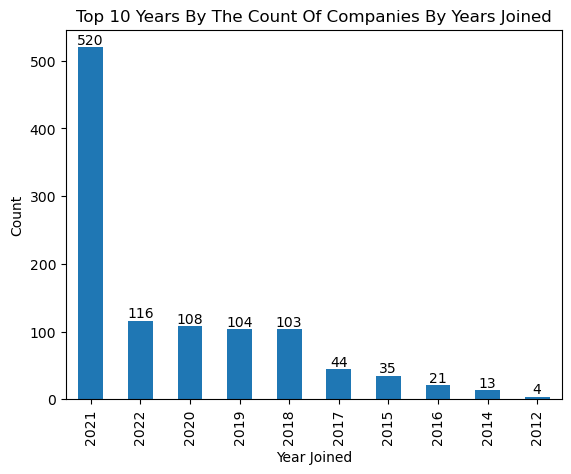

In [59]:
#and the highest peak in the number of companies that became unicorns was in 2021:

dx = df['Year Joined'].value_counts() \
                      .head(10) \
                      .plot(kind='bar', 
                      title = 'Top 10 Years By The Count Of Companies By Years Joined')

dx.set_ylabel('Count')
dx.bar_label(dx.containers[0])
plt.show()

### Let's see which countries have the most unicorns:

In [60]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Unicorn,Valuation In Billion,Funding In Billion,Return Of Investment,"ROI, %"
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,April,5,180,8.0,172.0,2150.00
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December,10,100,7.0,93.0,1328.57
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,July,10,100,2.0,98.0,4900.00
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,January,4,95,2.0,93.0,4650.00
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,December,6,46,4.0,42.0,1050.00


In [61]:
country_gr = df[['Company', 'Continent', 'Country']].groupby(['Continent', 'Country'])\
                                    .count()

country_gr['Total by Continent'] = country_gr.groupby(['Continent'])['Company'].transform('sum')
country_gr.sort_values(['Total by Continent', 'Company'], ascending=[False, False])

Company  Total by Continent
Continent     Country                                          
North America United States             562                 589
              Canada                     19                 589
              Mexico                      6                 589
              Bahamas                     1                 589
              Bermuda                     1                 589
Asia          China                     173                 310
              India                      65                 310
              Israel                     20                 310
              Singapore                  12                 310
              South Korea                12                 310
              Hong Kong                   6                 310
              Indonesia                   6                 310
              Japan                       5                 310
              United Arab Emirates        3                 310
              Philippines                 2                 310
              Thailand                    2                 310
              Vietnam                     2                 310
              Malaysia                    1                 310
              South Africa                1                 310
Europe        United Kingdom             43                 143
              Germany                    26                 143
              France                     24                 143
              Netherlands                 6                 143
              Sweden                      6                 143
              Ireland                     5                 143
              Switzerland                 5                 143
              Finland                     4                 143
              Norway                      4                 143
              Belgium                     3                 143
              Spain                       3                 143
              Turkey                      3                 143
              Austria                     2                 143
              Denmark                     2                 143
              Estonia                     2                 143
              Croatia                     1                 143
              Czech Republic              1                 143
              Italy                       1                 143
              Lithuania                   1                 143
              Luxembourg                  1                 143
South America Brazil                     16                  21
              Chile                       2                  21
              Colombia                    2                  21
              Argentina                   1                  21
Oceania       Australia                   8                   8
Africa        Nigeria                     1                   3
              Senegal                     1                   3
              South Africa                1                   3

In [62]:
#There is 1 leader in the above tables  - the United States with 562 companies.
#Asia also has one top dog - China with 173 compamies.
#I also can highlight India - 65 companies and United Kingdom - 43. 

In [63]:
#Let's create new column to display distribution of companies by continent

#Create dictionary to replace str-values to integer:

continent_dict = {'North America' : 1,
                  'Asia' : 2,
                  'Europe' : 3,
                  'South America' : 4,
                  'Oceania' : 5,
                  'Africa' : 6 }

df['Continent ID'] = df['Continent'].replace(continent_dict)
df.head(3)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Unicorn,Valuation In Billion,Funding In Billion,Return Of Investment,"ROI, %",Continent ID
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,April,5,180,8.0,172.0,2150.00,2
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December,10,100,7.0,93.0,1328.57,1
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,July,10,100,2.0,98.0,4900.00,2


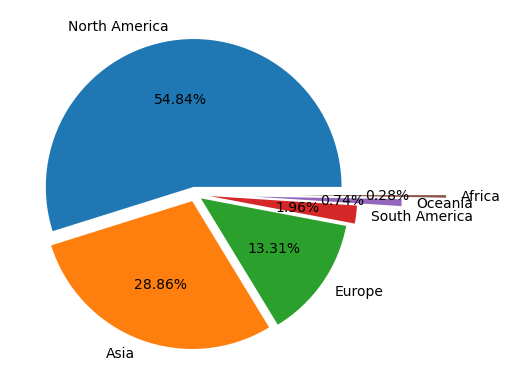

In [64]:
plt.pie(df['Continent ID'].value_counts(), 
        labels = ('North America', 'Asia', 'Europe', 'South America', 'Oceania', 'Africa'),
        explode = (0.05, 0.05, 0.05, 0.1, 0.4, 0.7),
        autopct='%1.2f%%')

plt.show()

In [65]:
#How about finding out are there any cities that appear to be industry hubs?

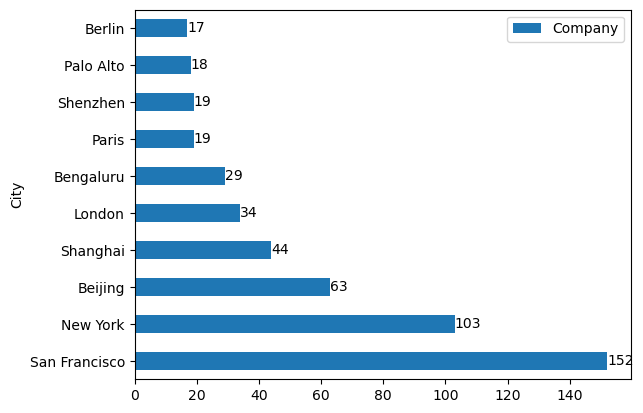

In [66]:
city_gr = df[['Company', 'City']].groupby('City').count().sort_values(by='Company', ascending=False)

ex = city_gr.head(10).plot(kind='barh', y='Company')

ex.bar_label(ex.containers[0])
plt.show()

In [67]:
#Here we see the main leaders - San Francisco and New York. 

### Let's see which investors have funded the most unicorns?

In [68]:
investors = df['Select Investors'].str.split(',').explode().value_counts()
investors = investors.reset_index()
investors.shape

(1527, 2)

In [69]:
investors.drop_duplicates(inplace = True)
investors.shape

(1527, 2)

In [70]:
investors.head(10)

,Select Investors,count
0,Tiger Global Management,39
1,Accel,32
2,Sequoia Capital,30
3,Sequoia Capital China,30
4,Andreessen Horowitz,29
5,Accel,28
6,Andreessen Horowitz,24
7,Insight Partners,24
8,Insight Partners,23
9,General Catalyst,23


In [71]:
#Here we see the top 10 investors by number of companies.

#Let's count how many investors invested in the same number of companies:

In [72]:
num_inv_by_comp = investors['count'].value_counts()
num_inv_by_comp

count
1     1107
2      200
3       63
4       45
5       23
6       20
7       13
8       10
13       5
9        5
12       5
10       3
11       3
14       3
17       3
16       2
18       2
19       2
21       2
23       2
24       2
30       2
32       1
15       1
28       1
29       1
39       1
Name: count, dtype: int64

In [73]:
#We see that only 220 investors were invested in more than 2 companies.

#61 investors were invested in 10 and more companies.

#And only 5 topdog companies were invested in more than 30 companies.

### Let's see which companies investors were most interested in.

In [74]:
df['Num_inv_of_comp'] = df['Select Investors'].map(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
most_intresting = df[['Company', 'Industry', 'Funding In Billion', 'ROI, %', 'Num_inv_of_comp']] \
                    .sort_values(by='Num_inv_of_comp', ascending = False).head(10)

most_intresting

,Company,Industry,Funding In Billion,"ROI, %",Num_inv_of_comp
0,Bytedance,Artificial intelligence,8.000,2150.00,4
246,Yixia,Mobile & telecommunications,0.775,287.10,4
149,Rappi,"Supply chain, logistics, & delivery",2.000,150.00,4
105,SVOLT,Auto & transportation,3.000,100.00,4
1025,Skydio,"Supply chain, logistics, & delivery",0.340,194.12,4
910,Evidation,Health,0.259,286.10,4
69,Niantic,Mobile & telecommunications,0.770,1068.83,4
510,Lightricks,Artificial intelligence,0.305,555.74,4
693,Degreed,Edtech,0.318,214.47,3
694,Deliverect,Fintech,0.237,321.94,3


In [75]:
#Here we have only 8 companies with the largest number of investors.

#Almost all companies are from different industries, but Supply chain, logistics, & delivery are their 2 companies.

#5 out of 8 companies have less than $1 billion in funding.

#Only 2 companies have ROI of more than 1000%.

In [76]:
most_intresting['Num_inv_of_comp'].mean()

3.8

In [77]:
#In average each company have 4 investors.

## Step 4 - Feature Relationship

### and more Unicorn visualisations.

In [78]:
#We have 1 outlier company, here I create the same data frame without this one for the next visualizations
#and check some info

df_out = df[df['Years To Unicorn'] != 98]
df_out[['Year Founded', 'Year Joined', 'Years To Unicorn']].describe()

,Year Founded,Year Joined,Years To Unicorn
count,1073.000000,1073.000000,1073.000000
mean,2012.975769,2019.899348,6.923579
std,4.920579,2.000263,4.538366
min,1979.000000,2007.000000,0.000000
25%,2011.000000,2019.000000,4.000000
50%,2014.000000,2021.000000,6.000000
75%,2016.000000,2021.000000,9.000000
max,2021.000000,2022.000000,37.000000


In [79]:
#Visualize the distribution of unicorns by year of founding and becoming by continent

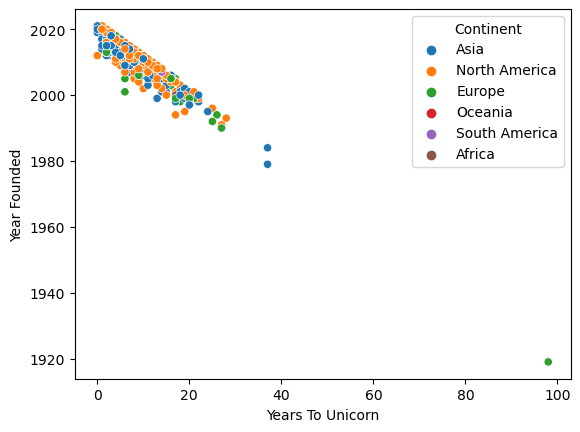

In [80]:
sns.scatterplot(x = 'Years To Unicorn',
               y = 'Year Founded',
               hue = 'Continent',
               data = df)
plt.show()

In [81]:
#As we already know, we have 1 outliers - let's see, how it looks like without this one:

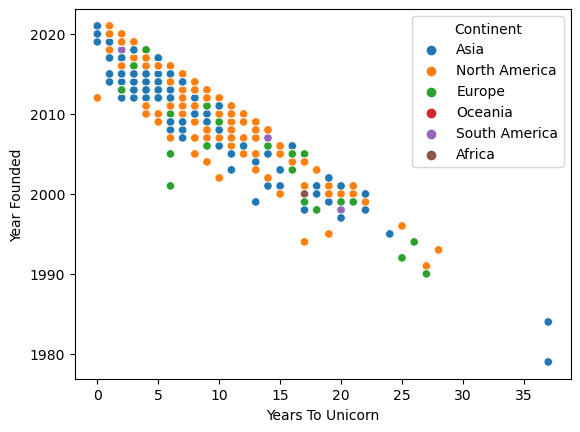

In [82]:
sns.scatterplot(x = 'Years To Unicorn',
               y = 'Year Founded',
               hue = 'Continent',
               data = df_out)
plt.show()

In [83]:
#There is no doubt that there is an overlap in the graph, 
#but most of the companies shown are based in North America and Asia, as we saw in the previous section.

In [84]:
#From the graph below, we can see the same information but more detailed in pairplot format.

/Users/maryshvaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


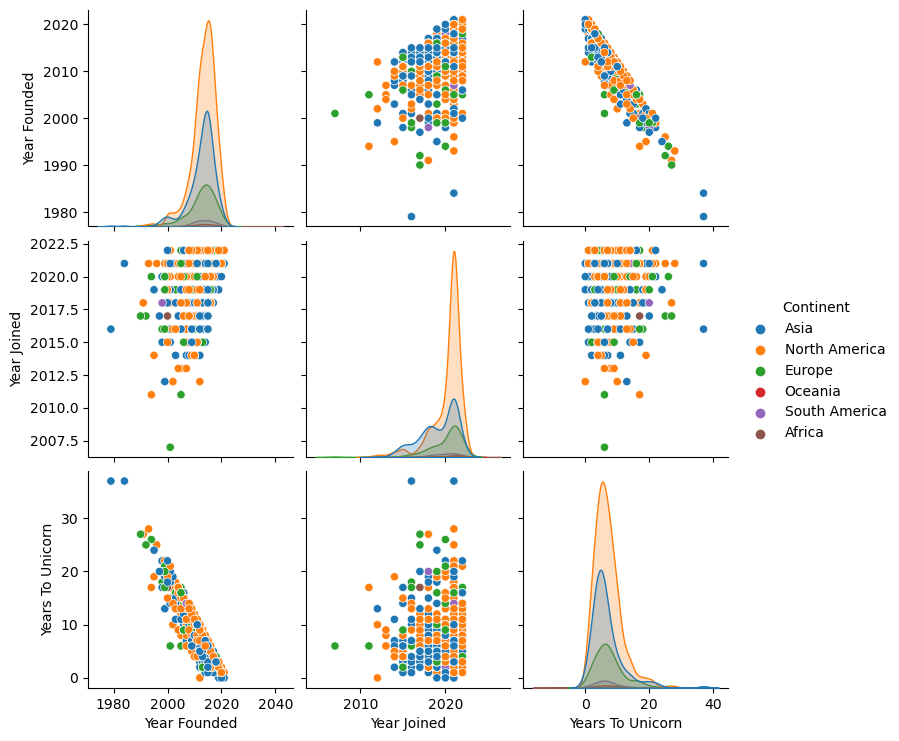

In [85]:
sns.pairplot(df_out, 
             vars =['Year Founded', 'Year Joined', 'Years To Unicorn'],
             hue = 'Continent')
plt.show()

In [86]:
#How would be correlation between these variables?

In [87]:
#with outlier
df_corr = df[['Year Founded', 'Year Joined', 'Years To Unicorn', 'Valuation In Billion']].corr()
df_corr

,Year Founded,Year Joined,Years To Unicorn,Valuation In Billion
Year Founded,1.000000,0.356191,-0.936181,-0.074089
Year Joined,0.356191,1.000000,-0.004996,-0.219981
Years To Unicorn,-0.936181,-0.004996,1.000000,-0.003466
Valuation In Billion,-0.074089,-0.219981,-0.003466,1.000000


In [88]:
#without outliers
df_out_corr = df_out[['Year Founded', 'Year Joined', 'Years To Unicorn', 'Valuation In Billion']].corr()
df_out_corr

,Year Founded,Year Joined,Years To Unicorn,Valuation In Billion
Year Founded,1.000000,0.386915,-0.913687,-0.084628
Year Joined,0.386915,1.000000,0.021245,-0.220110
Years To Unicorn,-0.913687,0.021245,1.000000,-0.005257
Valuation In Billion,-0.084628,-0.220110,-0.005257,1.000000


In [89]:
#The experiment with the exclusion of one outlier company did not impact our dependencies significantly, 
#only slightly changing all the correlation coefficients.

In [90]:
#What will the same information look like on a heat map?

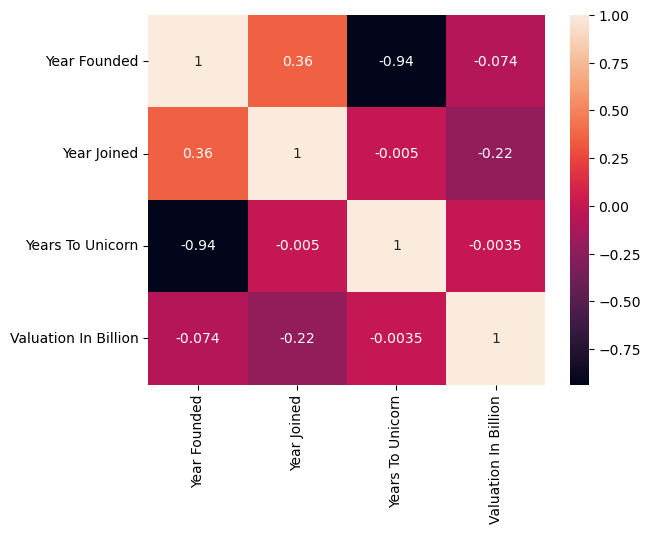

In [91]:
#with outlier
sns.heatmap(df_corr, annot=True)
plt.show()

In [92]:
#From the above heatmap we can see that between Year Founded & Years To Unicorn is strong negative correlation.

#I can conclude that the higher the year of the company's creation, 
#the less years it needs to become a unicorn.

#All the rest variables have no correlation or whose correlation value is near 0.

In [93]:
#Let's see distribution of companies by years to unicorn:
#1) create grouped dataframe

grouped_unicorn = df[['Company', 'Years To Unicorn']]\
                                    .groupby('Years To Unicorn') \
                                    .count().sort_values('Company', ascending=False)

grouped_unicorn = grouped_unicorn.reset_index()
grouped_unicorn.head()

,Years To Unicorn,Company
0,6,138
1,5,129
2,4,126
3,7,107
4,3,98


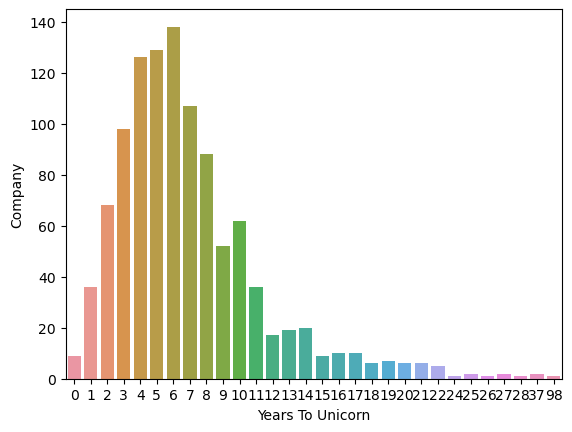

In [94]:
#2) visualize them with a histogram

sns.barplot(grouped_unicorn, x='Years To Unicorn', y='Company', 
            errorbar=('ci', False))

plt.show()

In [95]:
#Here we see that it took most companies 3-7 years to become a unicorn.

#Add a new column that will represent the range of years to become a unicorn:

In [96]:
range_to_unicorn = {range(0,5): 'Up to 5 years',
                   range(5,10) : '5-10 years',
                   range(10,15) : '10-15 years',
                   range(15,20) : '15-20 years',
                   range(20,30) : '20-30 years',
                   range(30,50) : '30-50 years',
                   range(50,100) : 'Above 50 years'}

grouped_unicorn['Range Of Years To Unicorn'] = grouped_unicorn['Years To Unicorn'].replace(range_to_unicorn)
grouped_unicorn.head()

,Years To Unicorn,Company,Range Of Years To Unicorn
0,6,138,5-10 years
1,5,129,5-10 years
2,4,126,Up to 5 years
3,7,107,5-10 years
4,3,98,Up to 5 years


In [97]:
#The best visualization for this is a pie chart.

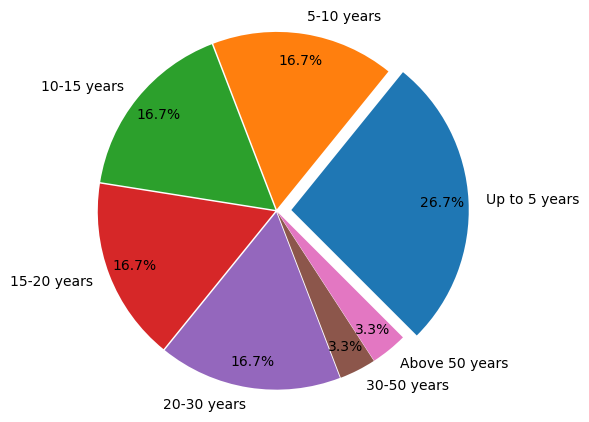

In [98]:
ax = plt.pie(grouped_unicorn['Range Of Years To Unicorn'].value_counts(), 
        explode = [0.1, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
        labels = ('Up to 5 years', '5-10 years', '10-15 years', '15-20 years', '20-30 years', '30-50 years', 'Above 50 years'),
        startangle = -45,
        autopct = '%1.1f%%',
        pctdistance = 0.85,
        radius = 1.2)

plt.show()

In [99]:
#26.7% of all companies become unicorns up to 5 years and 43.4% become unicorns in 0-9 years inclusive.

## Step 5 - Conclusions

### Following this research, I came to the next findings:

1) Only 1.21% (or 13 ) of companies have funding up to 1 million and 89.39% ( or 960 ) of companies have up to 1 billion.

2) Company with the highest ROI (%) in Fintech and Internet software&services

3) Minimun average years for becoming unicorn company in Auto & transportation, Artificial intelligence, E-commerce & direct-to-consumer and Hardware industry - 5-6 years

4) In average for every industry needs 3-7 years to become unicorn.

5) 26.7% companies becomes a unicorn up to 5 years.

6) Most unicorn companies founded in United States and China - 562 and 173 respectively

7) City which stands industry hubs for 255 company located in San Francisco and New York

8) In average each company have 4 investors.

9) The higher the year of the company's creation, the less years it needs to become a unicorn.